In [2]:
# Versuch Solarzelle

In [1]:
#pip install pandas-ods-reader

  Created wheel for ezodf: filename=ezodf-0.3.2-py2.py3-none-any.whl size=49007 sha256=cd00f93e97d1a75ecb91f29c18b09763241994951e172f2466a2dc9aa069338e
  Stored in directory: c:\users\makum\appdata\local\pip\cache\wheels\8f\60\52\bffa36b97e0136aa62d54948d56e8770b96a5da7f9c65fdd85
Successfully built ezodf
Note: you may need to restart the kernel to use updated packages.


In [151]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import openpyxl
import xlsxwriter
from pandas_ods_reader import read_ods

In [152]:
h = 6.62607015 * 1e-34
c = 299792458.
e = 1.602176634 * 1e-19

In [153]:
data1  = "Messung3_2Monokristallin.ods"
data2 = "Messung3_2Multikrist.ods"
data3 = "Messung3_2CIS.ods"

In [154]:
mono32 = read_ods(data1)
multi32 = read_ods(data2)
cis32 = read_ods(data3)

In [155]:
mono32

,Wellenlänge (nm),Leistung (uW),Abgegriffene Spannung (V),Sensitifity (mV),Feler Wellenlaene:,12nm
0,Unterrund,NaN,7.27,0.1,DriftLeistun,-634nW
1,363.2,47.18,6.17,3.0,None,None
2,400.3,72.12,6.12,10.0,None,None
3,450.8,123.10,5.56,30.0,None,None
4,499.2,152.90,8.45,30.0,None,None
5,599.1,211.60,4.46,100.0,None,None
6,699.9,197.90,5.08,100.0,None,None
7,799.5,150.90,4.65,100.0,None,None
8,899.8,214.30,7.04,100.0,None,None
9,949.4,231.10,7.48,100.0,None,None


In [156]:
#mono32 = mono32["Wellenlänge (nm)", "Leistung (uW)", "Abgegriffene Spannung (V)", "Sensitivity (mV)"]
mono32 = mono32.iloc[:, 0:4]
mono32.iloc[0,0] = np.nan

In [178]:
mono32["I_ph mU (A)"] = mono32["Abgegriffene Spannung (V)"] * mono32["Sensitifity (mV)"] / 1000 * np.sqrt(2) * np.pi * 0.25 * 1e-3
#mono32["I_ph mU (A)"] = mono32["Abgegriffene Spannung (V)"] * mono32["Sensitifity (mV)"] * 1e-7
mono32["I_ph (A)"] = mono32["I_ph mU (A)"] - mono32.loc[0, "I_ph mU (A)"]

In [158]:
#tRatio = np.array([[np.nan], [55.08], [55.05], [55.07], [54.57], [54.15], [53.68], [54.29], [53.27], [51.70], [51.08], [50.91], [50.97], [51.04]])
tRatio = np.array([[np.nan], [0.8155], [0.817], [0.816], [.833], [.847], [.863], [.842], [.877], [.943], [.958], [.964], [.962], [.9605]])

In [159]:
for i in range(0,14):
    mono32.loc[i,"tRatio"] = 1/tRatio[i]

In [160]:
mono32["P_ges (uW)"] = mono32["Leistung (uW)"] / mono32["tRatio"]

In [161]:
mono32["SE (A/W)"] = mono32["I_ph (A)"] / (mono32["P_ges (uW)"] / 1e6)
mono32["EQE"] = mono32["SE (A/W)"] / mono32["Wellenlänge (nm)"] * 1e9 * h * c / e

In [162]:
Ebkmono = 1.1242 * 1.602176487 * 1e-19
Lbkmono = h*c/Ebkmono * 1e9
Lbkmono

1102.8661253226671

In [163]:
mono32

,Wellenlänge (nm),Leistung (uW),Abgegriffene Spannung (V),Sensitifity (mV),I_ph mU (A),I_ph (A),tRatio,P_ges (uW),SE (A/W),EQE
0,NaN,NaN,7.27,0.1,8.074940e-07,0.000000,NaN,NaN,NaN,NaN
1,363.2,47.18,6.17,3.0,2.055944e-05,0.000020,1.226242,38.475290,0.513367,1.75246
2,400.3,72.12,6.12,10.0,6.797611e-05,0.000067,1.223990,58.922040,1.139957,3.53077
3,450.8,123.10,5.56,30.0,1.852682e-04,0.000184,1.225490,100.449600,1.836351,5.05054
4,499.2,152.90,8.45,30.0,2.815677e-04,0.000281,1.200480,127.365700,2.204363,5.47488
5,599.1,211.60,4.46,100.0,4.953814e-04,0.000495,1.180638,179.225200,2.759511,5.71083
6,699.9,197.90,5.08,100.0,5.642461e-04,0.000563,1.158749,170.787700,3.299059,5.84414
7,799.5,150.90,4.65,100.0,5.164851e-04,0.000516,1.187648,127.057800,4.058607,6.29397
8,899.8,214.30,7.04,100.0,7.819474e-04,0.000781,1.140251,187.941100,4.156302,5.727
9,949.4,231.10,7.48,100.0,8.308191e-04,0.000830,1.060445,217.927300,3.808663,4.97382


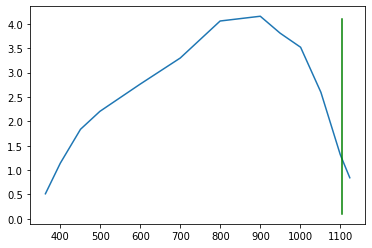

In [179]:
fig, ax = plt.subplots()
ax.plot(mono32["Wellenlänge (nm)"], mono32["SE (A/W)"] )
#ax.plot(mono32["Wellenlänge (nm)"], mono32["EQE"] )
dum = np.arange(.1,5)
fg = np.ones((5,1))*Lbkmono
ax.plot(fg, dum, color = 'green')

In [166]:
multi32

,Wellenlänge (nm),Leistung (uW),Abgegriffene Spannung (V),Sensitifity (mV),Feler Wellenlaene:,12nm
0,Untergrund,NaN,1.57,0.1,DriftLeistun,300.1
1,363.2,45.02,4.13,3.0,None,NaN
2,400.3,68.77,4.56,10.0,None,NaN
3,450.8,117.20,4.62,30.0,None,NaN
4,499.2,145.70,2.35,100.0,None,NaN
5,599.1,201.40,4.04,100.0,None,NaN
6,699.9,187.40,4.52,100.0,None,NaN
7,799.5,142.20,3.95,100.0,None,NaN
8,899.8,184.80,5.01,100.0,None,NaN
9,949.4,201.80,4.89,100.0,None,NaN


In [167]:
multi32 = multi32.iloc[0:15, 0:4]
multi32.iloc[0,0] = np.nan
multi32["I_ph mU (A)"] = multi32["Abgegriffene Spannung (V)"] * multi32["Sensitifity (mV)"] / 1000 * np.sqrt(2) * np.pi * 0.25 * 1e-3
#multi32["I_ph mU (A)"] = multi32["Abgegriffene Spannung (V)"] * multi32["Sensitifity (mV)"] * 10e-7
multi32["I_ph (A)"] = multi32["I_ph mU (A)"] - multi32.loc[0, "I_ph mU (A)"]
for i in range(0,14):
    multi32.loc[i,"tRatio"] = 1/tRatio[i]
multi32["P_ges (uW)"] = multi32["Leistung (uW)"] / multi32["tRatio"]
multi32["SE (A/W)"] = multi32["I_ph (A)"] / (multi32["P_ges (uW)"] / 1e6)
multi32["EQE"] = multi32["SE (A/W)"] / multi32["Wellenlänge (nm)"] * 1e9 * h * c / e
multi32

,Wellenlänge (nm),Leistung (uW),Abgegriffene Spannung (V),Sensitifity (mV),I_ph mU (A),I_ph (A),tRatio,P_ges (uW),SE (A/W),EQE
0,NaN,NaN,1.57,0.1,1.743832e-07,0.000000,NaN,NaN,NaN,NaN
1,363.2,45.02,4.13,3.0,1.376183e-05,0.000014,1.226242,36.713810,0.370091,1.26337
2,400.3,68.77,4.56,10.0,5.064887e-05,0.000050,1.223990,56.185090,0.898361,2.78248
3,450.8,117.20,4.62,30.0,1.539459e-04,0.000154,1.225490,95.635200,1.607897,4.42222
4,499.2,145.70,2.35,100.0,2.610194e-04,0.000261,1.200480,121.368100,2.149206,5.33789
5,599.1,201.40,4.04,100.0,4.487312e-04,0.000449,1.180638,170.585800,2.629508,5.44179
6,699.9,187.40,4.52,100.0,5.020458e-04,0.000502,1.158749,161.726200,3.103216,5.49721
7,799.5,142.20,3.95,100.0,4.387347e-04,0.000439,1.187648,119.732400,3.662837,5.68022
8,899.8,184.80,5.01,100.0,5.564711e-04,0.000556,1.140251,162.069600,3.432456,4.72961
9,949.4,201.80,4.89,100.0,5.431424e-04,0.000543,1.060445,190.297400,2.853261,3.72613


In [168]:
Ebkmulti = 1.1242 * 1.602176487 * 1e-19
Lbkmulti = h*c/Ebkmono * 1e9
Lbkmulti

1102.8661253226671

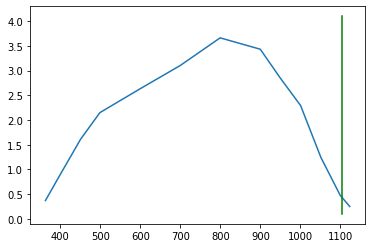

In [171]:
fig1, ax1 = plt.subplots()
ax1.plot(multi32["Wellenlänge (nm)"], multi32["SE (A/W)"] )
#ax1.plot(multi32["Wellenlänge (nm)"], multi32["EQE"] )
dum1 = np.arange(.1,5)
fg1 = np.ones((5,1))*Lbkmulti
ax1.plot(fg1, dum1, color = 'green')

In [172]:
cis32 = cis32.iloc[0:15, 0:4]
cis32.iloc[0,0] = np.nan
cis32["I_ph mU (A)"] = cis32["Abgegriffene Spannung (V)"] * cis32["Sensitifity (mV)"] / 1000 * np.sqrt(2) * np.pi * 0.25 * 1e-3
#cis32["I_ph mU (A)"] = cis32["Abgegriffene Spannung (V)"] * cis32["Sensitifity (mV)"] * 1e-7
cis32["I_ph (A)"] = cis32["I_ph mU (A)"] - cis32.loc[0, "I_ph mU (A)"]
for i in range(0,14):
    cis32.loc[i,"tRatio"] = 1/tRatio[i]
cis32["P_ges (uW)"] = cis32["Leistung (uW)"] / cis32["tRatio"]
cis32["SE (A/W)"] = cis32["I_ph (A)"] / (cis32["P_ges (uW)"] / 1e6)
cis32["EQE"] = cis32["SE (A/W)"] / cis32["Wellenlänge (nm)"] * 1e9 * h * c / e
cis32

,Wellenlänge (nm),Leistung (uW),Abgegriffene Spannung (V),Sensitifity (mV),I_ph mU (A),I_ph (A),tRatio,P_ges (uW),SE (A/W),EQE
0,NaN,NaN,0.16,0.1,1.777153e-08,0.000000e+00,NaN,NaN,NaN,NaN
1,363.2,44.50,2.91,0.1,3.232197e-07,3.054482e-07,1.226242,36.28975,0.008417,0.0287325
2,400.3,68.18,3.87,1.0,4.298489e-06,4.280718e-06,1.223990,55.70306,0.076849,0.238023
3,450.8,116.70,4.57,3.0,1.522798e-05,1.521021e-05,1.225490,95.22720,0.159725,0.439295
4,499.2,145.00,6.81,3.0,2.269202e-05,2.267425e-05,1.200480,120.78500,0.187724,0.466242
5,599.1,201.00,3.68,10.0,4.087452e-05,4.085675e-05,1.180638,170.24700,0.239985,0.496651
6,699.9,188.50,4.08,10.0,4.531741e-05,4.529963e-05,1.158749,162.67550,0.278466,0.493291
7,799.5,144.10,3.65,10.0,4.054131e-05,4.052354e-05,1.187648,121.33220,0.333988,0.51794
8,899.8,197.10,5.02,10.0,5.575818e-05,5.574041e-05,1.140251,172.85670,0.322466,0.444329
9,949.4,211.00,5.08,10.0,5.642461e-05,5.640684e-05,1.060445,198.97300,0.283490,0.370216


In [182]:
Ebkcis = 1.02 * 1.602176487 * 1e-19
Lbkcis = h*c/Ebkcis * 1e9
Lbkcis

1215.531468713473

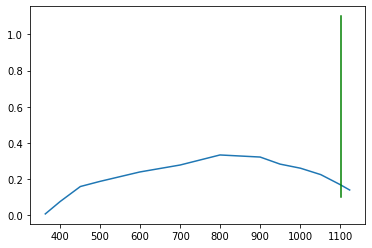

In [183]:
fig2, ax2 = plt.subplots()
ax2.plot(cis32["Wellenlänge (nm)"], cis32["SE (A/W)"] )
#ax2.plot(cis32["Wellenlänge (nm)"], cis32["EQE"] )
dum2 = np.arange(.1,2)
fg2 = np.ones((2,1))*Lbkmono
ax2.plot(fg2, dum2, color = 'green')

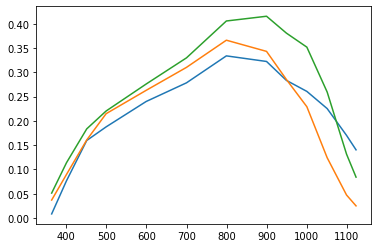

In [180]:
fig3, ax3 = plt.subplots()
ax3.plot(cis32["Wellenlänge (nm)"], cis32["SE (A/W)"] )
#ax3.plot(cis32["Wellenlänge (nm)"], cis32["EQE"] )
ax3.plot(multi32["Wellenlänge (nm)"], multi32["SE (A/W)"] /10)
#ax3.plot(multi32["Wellenlänge (nm)"], multi32["EQE"] )
ax3.plot(mono32["Wellenlänge (nm)"], mono32["SE (A/W)"]/10 )
#ax3.plot(mono32["Wellenlänge (nm)"], mono32["EQE"] )


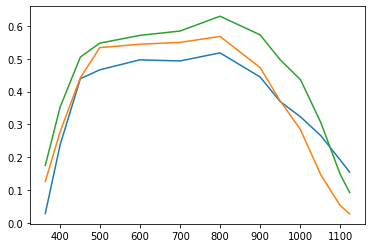

In [181]:
fig4, ax4 = plt.subplots()
ax4.plot(cis32["Wellenlänge (nm)"], cis32["EQE"] )
ax4.plot(multi32["Wellenlänge (nm)"], multi32["EQE"] / 10 )
ax4.plot(mono32["Wellenlänge (nm)"], mono32["EQE"] / 10 )


In [132]:
multi32.to_latex()

'\\begin{tabular}{llrrrrrrrrl}\n\\toprule\n{} & Wellenlänge (nm) &  Leistung (uW) &  Abgegriffene Spannung (V) &  Sensitifity (mV) &  I\\_ph mU (A) &  I\\_ph (A) &    tRatio &  P\\_ges (uW) &    SE (A/W) &      EQE \\\\\n\\midrule\n0  &              NaN &            NaN &                       1.57 &               0.1 &     0.000002 &  0.000000 &       NaN &         NaN &         NaN &      NaN \\\\\n1  &            363.2 &          45.02 &                       4.13 &               3.0 &     0.000138 &  0.000136 &  1.226242 &   36.713810 &   37.009089 &  1263.37 \\\\\n2  &            400.3 &          68.77 &                       4.56 &              10.0 &     0.000506 &  0.000505 &  1.223990 &   56.185090 &   89.836080 &  2782.48 \\\\\n3  &            450.8 &         117.20 &                       4.62 &              30.0 &     0.001539 &  0.001538 &  1.225490 &   95.635200 &  160.789658 &  4422.22 \\\\\n4  &            499.2 &         145.70 &                       2.35 &           

In [149]:
1e2

100.0